In [1]:
# Pull data command:
# python download_data.py --project=model-free-minigrid --history_vars step reward recon_loss ep_length --params env_name ae_model_type ep_length mf_steps rl_start_step n_ae_updates ae_recon_loss e2e_loss

In [ ]:
import os
import sys
sys.path.append(os.path.abspath('../../..'))
from plotting_utils import *

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns

%matplotlib inline
set_matplotlib_style()

In [3]:
data_path = 'data/model-free-minigrid_data.csv'
df = pd.read_csv(data_path, index_col=0)
df['Model Type'] = df['ae_model_type']

model_type_map = {
  'ae': 'Continuous',
  'vqvae': 'Discrete',
  'fta_ae': 'FTA',
  'softmax_ae': 'Softmax AE',
}
df['Model Type'] = df['Model Type'].apply(lambda x: model_type_map[x])
df['Model Type'] = df.apply(
  (lambda x: x['Model Type'] if x['ae_recon_loss'] else 'End-to-End'), axis=1)

# Remove all softmax
df = df[df['ae_model_type'] != 'softmax_ae']

df['return'] = df['reward'] * df['ep_length']

# Drop na in rows where ae_recon_loss is True
# df = df.dropna(subset=['ae_recon_loss'])

## Baseline RL performance

/tmp/ipykernel_31172/391410374.py:9: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for env_name, group in determ_env_df.groupby(['env_name']):


Model Type
Continuous    30
Discrete      30
Name: experiment_key, dtype: int64


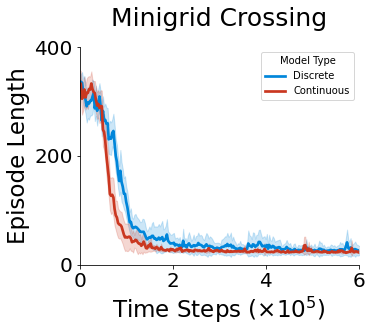

Model Type
Continuous    30
Discrete      30
Name: experiment_key, dtype: int64


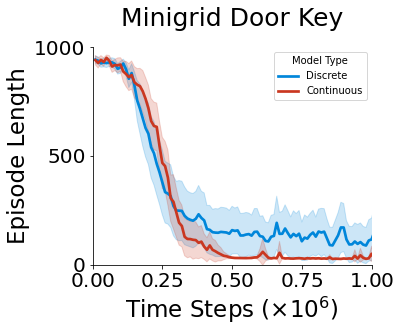

In [4]:
determ_env_df = df[
  ~df['env_name'].str.contains('-rand') &
  (df['rl_start_step'] == 0) &
  ((df['Model Type'] == 'Continuous') | (df['Model Type'] == 'Discrete'))
]

set_matplotlib_style(style='4-row')

for env_name, group in determ_env_df.groupby(['env_name']):
  max_step = group['step'].max()
  # Print number of unique experiment_key values per Model Type
  print(group.groupby(['Model Type'])['experiment_key'].nunique())
  if 'crossing' in env_name.lower():
    max_step = int(6e5)
  elif 'key' in env_name.lower():
    max_step = int(1e6)

  
  color_palette = get_color_palette(group['Model Type'].unique())
  sns.lineplot(
    group, x='step', y='ep_length', hue='Model Type',
    errorbar=t_distrib, palette=color_palette)
  
  plt.title(f'{standardize_env_name(env_name)}')
  set_fig_labels('Time Steps', 'Episode Length', xsci=True)

  yticks = plt.gca().get_yticks()
  plt.gca().set_yticks(yticks[1::2])

  xticks = plt.gca().get_xticks()
  # plt.gca().set_xticks(xticks[1::2])

  plt.xlim(0, max_step)

  max_y = group['ep_length'].max()
  max_y = int(np.ceil(max_y / 100)) * 100
  plt.ylim(0, max_y)
  plt.gca().set_yticks([0, max_y // 2, max_y])
  
  save_fig_versions(f'{standardize_env_name(env_name)}_vanilla_rl_ep_len')
  plt.show()

/tmp/ipykernel_31172/117537957.py:8: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for env_name, group in determ_env_df.groupby(['env_name']):


Model Type
Continuous    30
Discrete      30
End-to-End    30
FTA           30
Name: experiment_key, dtype: int64


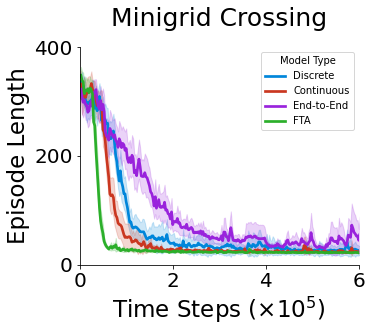

Model Type
Continuous    30
Discrete      30
End-to-End    30
FTA           30
Name: experiment_key, dtype: int64


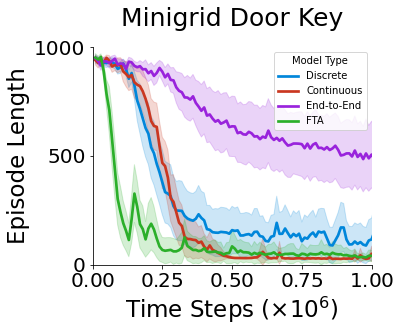

In [5]:
determ_env_df = df[
  ~df['env_name'].str.contains('-rand') &
  (df['rl_start_step'] == 0)
]

set_matplotlib_style(style='4-row')

for env_name, group in determ_env_df.groupby(['env_name']):
  max_step = group['step'].max()
  # Print number of unique experiment_key values per Model Type
  print(group.groupby(['Model Type'])['experiment_key'].nunique())
  if 'crossing' in env_name.lower():
    max_step = int(6e5)
  elif 'key' in env_name.lower():
    max_step = int(1e6)

  
  color_palette = get_color_palette(group['Model Type'].unique())
  sns.lineplot(
    group, x='step', y='ep_length', hue='Model Type',
    errorbar=t_distrib, palette=color_palette)
  
  plt.title(f'{standardize_env_name(env_name)}')
  set_fig_labels('Time Steps', 'Episode Length', xsci=True)

  yticks = plt.gca().get_yticks()
  plt.gca().set_yticks(yticks[1::2])

  xticks = plt.gca().get_xticks()
  # plt.gca().set_xticks(xticks[1::2])

  plt.xlim(0, max_step)
  
  max_y = group['ep_length'].max()
  max_y = int(np.ceil(max_y / 100)) * 100
  plt.ylim(0, max_y)
  plt.gca().set_yticks([0, max_y // 2, max_y])
  
  save_fig_versions(f'{standardize_env_name(env_name)}_vanilla_rl_ep_len_baselines')
  plt.show()

### Recon loss

/tmp/ipykernel_31172/4246745663.py:10: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for env_name, group in determ_env_df.groupby(['env_name']):


{'step': 'first', 'reward': 'mean', 'recon_loss': 'mean', 'ep_length': 'mean', 'ae_model_type': 'first', 'ae_recon_loss': 'first', 'env_name': 'first', 'mf_steps': 'mean', 'n_ae_updates': 'mean', 'rl_start_step': 'mean', 'experiment_key': 'first', 'Model Type': 'first', 'return': 'mean'}
Model Type
Continuous    30
Discrete      30
Name: experiment_key, dtype: int64


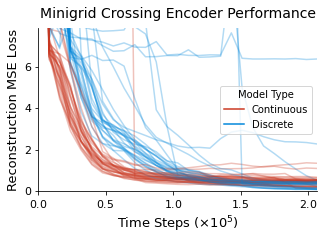

{'step': 'first', 'reward': 'mean', 'recon_loss': 'mean', 'ep_length': 'mean', 'ae_model_type': 'first', 'ae_recon_loss': 'first', 'env_name': 'first', 'mf_steps': 'mean', 'n_ae_updates': 'mean', 'rl_start_step': 'mean', 'experiment_key': 'first', 'Model Type': 'first', 'return': 'mean'}
Model Type
Continuous    30
Discrete      30
Name: experiment_key, dtype: int64


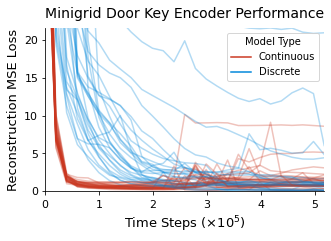

In [6]:
determ_env_df = df[
  ~df['env_name'].str.contains('-rand') &
  (df['rl_start_step'] == 0) &
  df['ae_recon_loss'] &
  ((df['Model Type'] == 'Continuous') | (df['Model Type'] == 'Discrete'))
]

set_matplotlib_style()

for env_name, group in determ_env_df.groupby(['env_name']):
  group = bin_df(group, 100).dropna()
  max_step = np.percentile(group['step'], 25.8)
  group = group[group['step'] <= max_step]
  
  print(group.groupby(['Model Type'])['experiment_key'].nunique())
  
  # Set up the figure and axis
  fig, ax = plt.subplots()

  # Create a list of unique Model Types
  model_types = group['Model Type'].unique()
  color_palette = get_color_palette(group['Model Type'].unique())

  all_runs = {}

  # Loop through the model types
  for i, model_type in enumerate(model_types):
    # Filter the data for the current model type
    filtered_data = group[group['Model Type'] == model_type]
    # Loop through the individual experiments within the current model type
    for experiment_key, experiment_data in filtered_data.groupby('experiment_key'):
      all_runs[experiment_key] = {
        'data': experiment_data,
        'color': color_palette[model_type]
        }

  # Loop through the individual experiments in random order
  rand_keys = list(all_runs.keys())
  np.random.shuffle(rand_keys)

  for experiment_key in rand_keys:
    # Plot the line with partial transparency
    sns.lineplot(
      data=all_runs[experiment_key]['data'],
      x='step',
      y='recon_loss',
      ax=ax,
      color=all_runs[experiment_key]['color'],
      alpha=0.3,
      legend=False,
    )

  # Add a legend manually
  for i, model_type in enumerate(model_types):
    ax.plot([], [], color=color_palette[model_type], label=model_type)

  ax.legend(title='Model Type')
  
  plt.title(f'{standardize_env_name(env_name)} Encoder Performance')
  set_fig_labels('Time Steps', 'Reconstruction MSE Loss', xsci=True)

  plt.xlim(0, max_step)
  plt.ylim(0, np.percentile(group['recon_loss'], 90))

  save_fig_versions(f'{standardize_env_name(env_name)}_vanilla_rl_recon')
  plt.show()

/tmp/ipykernel_31172/734229832.py:9: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for env_name, group in determ_env_df.groupby(['env_name']):


{'step': 'first', 'reward': 'mean', 'recon_loss': 'mean', 'ep_length': 'mean', 'ae_model_type': 'first', 'ae_recon_loss': 'first', 'env_name': 'first', 'mf_steps': 'mean', 'n_ae_updates': 'mean', 'rl_start_step': 'mean', 'experiment_key': 'first', 'Model Type': 'first', 'return': 'mean'}
Model Type
Continuous    30
Discrete      30
FTA           30
Name: experiment_key, dtype: int64


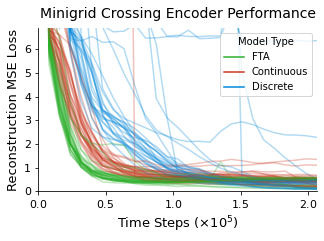

{'step': 'first', 'reward': 'mean', 'recon_loss': 'mean', 'ep_length': 'mean', 'ae_model_type': 'first', 'ae_recon_loss': 'first', 'env_name': 'first', 'mf_steps': 'mean', 'n_ae_updates': 'mean', 'rl_start_step': 'mean', 'experiment_key': 'first', 'Model Type': 'first', 'return': 'mean'}
Model Type
Continuous    30
Discrete      30
FTA           30
Name: experiment_key, dtype: int64


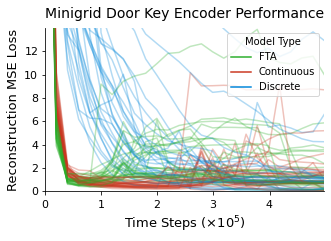

In [7]:
determ_env_df = df[
  ~df['env_name'].str.contains('-rand') &
  (df['rl_start_step'] == 0) &
  df['ae_recon_loss']
]

set_matplotlib_style()

for env_name, group in determ_env_df.groupby(['env_name']):
  group = bin_df(group, 100).dropna()
  max_step = np.percentile(group['step'], 25.8)
  group = group[group['step'] <= max_step]
  
  print(group.groupby(['Model Type'])['experiment_key'].nunique())
  
  # Set up the figure and axis
  fig, ax = plt.subplots()

  # Create a list of unique Model Types
  model_types = group['Model Type'].unique()
  color_palette = get_color_palette(group['Model Type'].unique())

  all_runs = {}

  # Loop through the model types
  for i, model_type in enumerate(model_types):
    # Filter the data for the current model type
    filtered_data = group[group['Model Type'] == model_type]
    # Loop through the individual experiments within the current model type
    for experiment_key, experiment_data in filtered_data.groupby('experiment_key'):
      all_runs[experiment_key] = {
        'data': experiment_data,
        'color': color_palette[model_type]
        }

  # Loop through the individual experiments in random order
  rand_keys = list(all_runs.keys())
  np.random.shuffle(rand_keys)

  for experiment_key in rand_keys:
    # Plot the line with partial transparency
    sns.lineplot(
      data=all_runs[experiment_key]['data'],
      x='step',
      y='recon_loss',
      ax=ax,
      color=all_runs[experiment_key]['color'],
      alpha=0.3,
      legend=False,
    )

  # Add a legend manually
  for i, model_type in enumerate(model_types):
    ax.plot([], [], color=color_palette[model_type], label=model_type)

  ax.legend(title='Model Type')
  
  plt.title(f'{standardize_env_name(env_name)} Encoder Performance')
  set_fig_labels('Time Steps', 'Reconstruction MSE Loss', xsci=True)

  plt.xlim(0, max_step)
  plt.ylim(0, np.percentile(group['recon_loss'], 90))

  save_fig_versions(f'{standardize_env_name(env_name)}_vanilla_rl_recon_baselines')
  plt.show()

## Delayed start RL performance

/tmp/ipykernel_31172/4158431764.py:15: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for env_name, group in determ_env_df.groupby(['env_name']):


Model Type
Continuous    30
Discrete      30
Name: experiment_key, dtype: int64


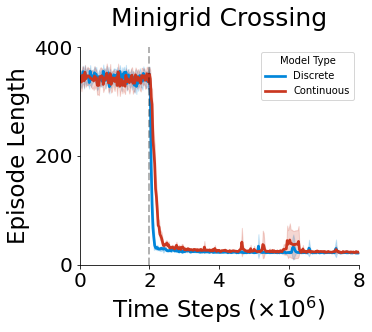

Model Type
Continuous    30
Discrete      30
Name: experiment_key, dtype: int64


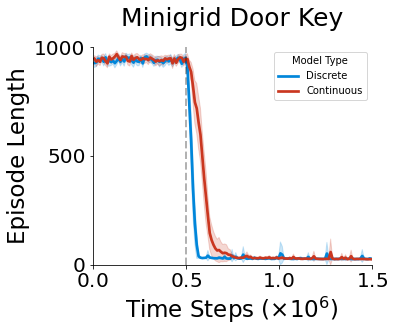

In [8]:
determ_env_df = df[
  ~df['env_name'].str.contains('-rand') &
  (
    (
      (df['rl_start_step'] > 100000) &
      df['ae_recon_loss']
    ) |
    ~df['ae_recon_loss']
  ) &
  ((df['Model Type'] == 'Continuous') | (df['Model Type'] == 'Discrete'))
]

set_matplotlib_style(style='4-row')

for env_name, group in determ_env_df.groupby(['env_name']):
  max_step = group['step'].max()
  if 'crossing' in env_name.lower():
    max_step = int(8e5)
  elif 'key' in env_name.lower():
    max_step = int(1.5e6)
  rl_start_step = group.iloc[0]['rl_start_step']

  print(group.groupby(['Model Type'])['experiment_key'].nunique())
  
  color_palette = get_color_palette(group['Model Type'].unique())
  sns.lineplot(
    group, x='step', y='ep_length', hue='Model Type',
    errorbar=t_distrib, palette=color_palette)
  
  plt.axvline(x=rl_start_step, color='black', linestyle='--', alpha=0.3, linewidth=2)
  
  plt.title(f'{standardize_env_name(env_name)}')
  set_fig_labels('Time Steps', 'Episode Length', xsci=True)

  plt.xlim(0, max_step)

  max_y = group['ep_length'].max()
  max_y = int(np.ceil(max_y / 100)) * 100
  plt.ylim(0, max_y)
  plt.gca().set_yticks([0, max_y // 2, max_y])
  
  save_fig_versions(f'{standardize_env_name(env_name)}_delayed_rl_ep_len')
  plt.show()

/tmp/ipykernel_31172/1016022663.py:14: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for env_name, group in determ_env_df.groupby(['env_name']):


Model Type
Continuous    30
Discrete      30
End-to-End    30
FTA           30
Name: experiment_key, dtype: int64


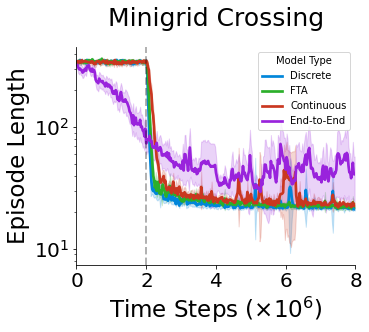

Model Type
Continuous    30
Discrete      30
End-to-End    30
FTA           31
Name: experiment_key, dtype: int64


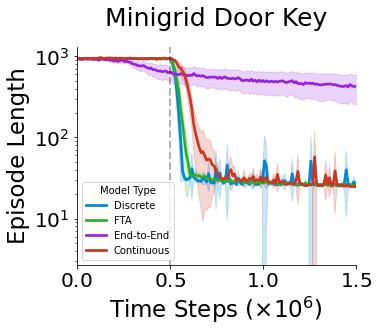

In [12]:
determ_env_df = df[
  ~df['env_name'].str.contains('-rand') &
  (
    (
      (df['rl_start_step'] > 100000) &
      df['ae_recon_loss']
    ) |
    ~df['ae_recon_loss']
  )
]

set_matplotlib_style(style='4-row')

for env_name, group in determ_env_df.groupby(['env_name']):
  max_step = group['step'].max()
  if 'crossing' in env_name.lower():
    max_step = int(8e5)
  elif 'key' in env_name.lower():
    max_step = int(1.5e6)
  rl_start_step = group.iloc[0]['rl_start_step']

  print(group.groupby(['Model Type'])['experiment_key'].nunique())
  
  color_palette = get_color_palette(group['Model Type'].unique())
  sns.lineplot(
    group, x='step', y='ep_length', hue='Model Type',
    errorbar=t_distrib, palette=color_palette)
  
  plt.axvline(x=rl_start_step, color='black', linestyle='--', alpha=0.3, linewidth=2)
  
  plt.title(f'{standardize_env_name(env_name)}')
  set_fig_labels('Time Steps', 'Episode Length', xsci=True)

  plt.xlim(0, max_step)

  max_y = group['ep_length'].max()
  max_y = int(np.ceil(max_y / 100)) * 100
  plt.ylim(0, max_y)
  plt.gca().set_yticks([0, max_y // 2, max_y])
  
  save_fig_versions(f'{standardize_env_name(env_name)}_delayed_rl_ep_len_baselines')
  plt.show()

## Sample efficient encoder

/tmp/ipykernel_31172/3786146313.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df['AE Updates'] = group_df['n_ae_updates'].astype(int).astype(str)
/tmp/ipykernel_31172/3786146313.py:9: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for rl_start_step, group in group_df.groupby(['rl_start_step']):


{'step': 'first', 'reward': 'mean', 'recon_loss': 'mean', 'ep_length': 'mean', 'ae_model_type': 'first', 'ae_recon_loss': 'first', 'env_name': 'first', 'mf_steps': 'mean', 'n_ae_updates': 'mean', 'rl_start_step': 'mean', 'experiment_key': 'first', 'Model Type': 'first', 'return': 'mean', 'AE Updates': 'first'}
Model Type
Discrete    15
Name: experiment_key, dtype: int64


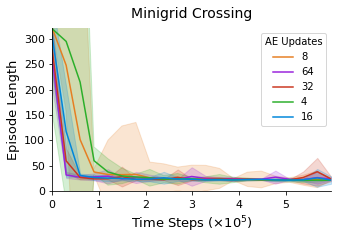

{'step': 'first', 'reward': 'mean', 'recon_loss': 'mean', 'ep_length': 'mean', 'ae_model_type': 'first', 'ae_recon_loss': 'first', 'env_name': 'first', 'mf_steps': 'mean', 'n_ae_updates': 'mean', 'rl_start_step': 'mean', 'experiment_key': 'first', 'Model Type': 'first', 'return': 'mean', 'AE Updates': 'first'}
Model Type
Discrete    15
Name: experiment_key, dtype: int64


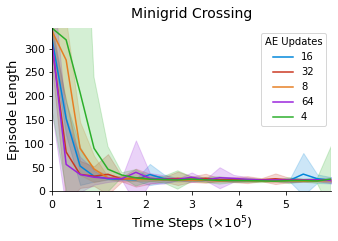

{'step': 'first', 'reward': 'mean', 'recon_loss': 'mean', 'ep_length': 'mean', 'ae_model_type': 'first', 'ae_recon_loss': 'first', 'env_name': 'first', 'mf_steps': 'mean', 'n_ae_updates': 'mean', 'rl_start_step': 'mean', 'experiment_key': 'first', 'Model Type': 'first', 'return': 'mean', 'AE Updates': 'first'}
Model Type
Discrete    15
Name: experiment_key, dtype: int64


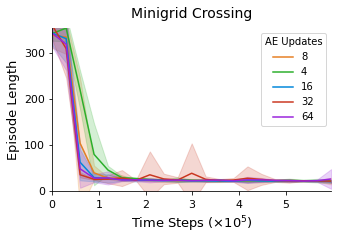

{'step': 'first', 'reward': 'mean', 'recon_loss': 'mean', 'ep_length': 'mean', 'ae_model_type': 'first', 'ae_recon_loss': 'first', 'env_name': 'first', 'mf_steps': 'mean', 'n_ae_updates': 'mean', 'rl_start_step': 'mean', 'experiment_key': 'first', 'Model Type': 'first', 'return': 'mean', 'AE Updates': 'first'}
Model Type
Discrete    15
Name: experiment_key, dtype: int64


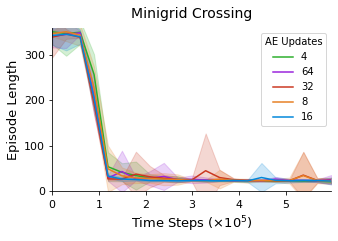

In [10]:
group_df = df[
  (df['rl_start_step'] > 0) &
  (df['rl_start_step'] <= 100000)
]
group_df['AE Updates'] = group_df['n_ae_updates'].astype(int).astype(str)

set_matplotlib_style()

for rl_start_step, group in group_df.groupby(['rl_start_step']):
  group = bin_df(group, 20)
  env_name = group.iloc[0]['env_name']
  max_step = group['step'].max()

  print(group.groupby(['Model Type'])['experiment_key'].nunique())

  color_palette = get_color_palette(group['AE Updates'].unique())
  sns.lineplot(
    group, x='step', y='ep_length', hue='AE Updates',
    errorbar=t_distrib, palette=color_palette)

  plt.title(f'{standardize_env_name(env_name)}')
  set_fig_labels('Time Steps', 'Episode Length', xsci=True)

  plt.xlim(0, max_step)
  plt.ylim(0, np.percentile(group['ep_length'], 99))

  plt.show()